In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
X, y = make_circles(n_samples=1000, factor=0.5)
print(X.shape, y.shape)

(1000, 2) (1000,)


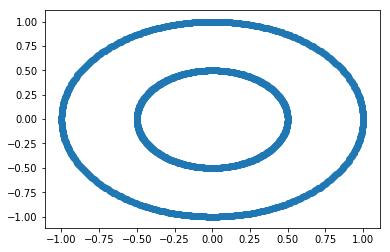

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

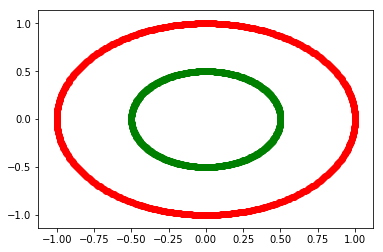

In [4]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')

plt.show()

In [5]:
Y = np_utils.to_categorical(y)
print(Y.shape)

for ix in range(10):
    print(Y[ix], "---", y[ix])

(1000, 2)
[0. 1.] --- 1
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0
[1. 0.] --- 0
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0


In [6]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print(X_train.shape)

(800, 2)


In [7]:
## NN in keras
model = Sequential()

model.add(Dense(5,input_shape = (2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [8]:
model2 = Sequential()

model2.add(Dense(2, input_shape=(2,)))
for ix in range(5):
    model2.add(Dense(5))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist = model.fit(X_train, y_train, epochs=100,batch_size=100,verbose=2, shuffle=True ,validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 14s - loss: 0.6812 - acc: 0.5212 - val_loss: 0.6681 - val_acc: 0.5800
Epoch 2/100
 - 0s - loss: 0.6718 - acc: 0.5737 - val_loss: 0.6620 - val_acc: 0.6150
Epoch 3/100
 - 0s - loss: 0.6657 - acc: 0.6163 - val_loss: 0.6566 - val_acc: 0.6450
Epoch 4/100
 - 0s - loss: 0.6607 - acc: 0.6375 - val_loss: 0.6521 - val_acc: 0.6650
Epoch 5/100
 - 0s - loss: 0.6563 - acc: 0.6562 - val_loss: 0.6479 - val_acc: 0.6750
Epoch 6/100
 - 0s - loss: 0.6515 - acc: 0.6888 - val_loss: 0.6440 - val_acc: 0.7200
Epoch 7/100
 - 0s - loss: 0.6475 - acc: 0.7387 - val_loss: 0.6405 - val_acc: 0.7400
Epoch 8/100
 - 0s - loss: 0.6439 - acc: 0.7425 - val_loss: 0.6376 - val_acc: 0.7450
Epoch 9/100
 - 0s - loss: 0.6408 - acc: 0.7387 - val_loss: 0.6351 - val_acc: 0.7400
Epoch 10/100
 - 0s - loss: 0.6381 - acc: 0.7413 - val_loss: 0.6327 - val_acc: 0.7450
Epoch 11/100
 - 0s - loss: 0.6358 - acc: 0.7525 - val_loss: 0.6305 - val_acc: 0.7500
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.5210 - acc: 0.8913 - val_loss: 0.5190 - val_acc: 0.8850
Epoch 98/100
 - 0s - loss: 0.5200 - acc: 0.8912 - val_loss: 0.5180 - val_acc: 0.8850
Epoch 99/100
 - 0s - loss: 0.5190 - acc: 0.8938 - val_loss: 0.5169 - val_acc: 0.8850
Epoch 100/100
 - 0s - loss: 0.5180 - acc: 0.8950 - val_loss: 0.5159 - val_acc: 0.8850


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train, y[:split])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr.score(X_test, y[split:])

0.42

In [22]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [23]:
data = hist.history
print(data)

{'val_loss': [0.6680817008018494, 0.6619903743267059, 0.6565914154052734, 0.6521389484405518, 0.6479358971118927, 0.6439546048641205, 0.6404794752597809, 0.6376370191574097, 0.6350595653057098, 0.6326631605625153, 0.6304914057254791, 0.6283411681652069, 0.6261172592639923, 0.6240187883377075, 0.6219520568847656, 0.6200576424598694, 0.6182131469249725, 0.6164236068725586, 0.6146785914897919, 0.6129849255084991, 0.6113786995410919, 0.6098333597183228, 0.6082727015018463, 0.6067409217357635, 0.6051846742630005, 0.6036308407783508, 0.6021563112735748, 0.6006934344768524, 0.5991848409175873, 0.5977509915828705, 0.5962786674499512, 0.5947489440441132, 0.5932405292987823, 0.5918714702129364, 0.5904106497764587, 0.589136391878128, 0.5877408385276794, 0.5864010751247406, 0.5850638747215271, 0.5838109850883484, 0.5824231803417206, 0.5811223387718201, 0.5797730982303619, 0.5784674882888794, 0.5772392153739929, 0.575972318649292, 0.574722945690155, 0.5735349059104919, 0.5722925066947937, 0.5711042

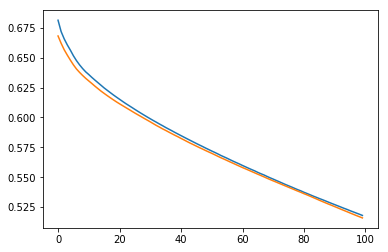

In [24]:
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.show()